In [1]:
import face_detector as fd
import os
from get_faces_help import (Reporter, get_video_paths) 
import imageio
import numpy as np
from PIL import Image

In [2]:
# Directory with the original video files
dir_video = '/Users/Konstantinos/simpsons_data/video_files'
# Directory with the cropped faces
dir_cropped = '/Users/Konstantinos/simpsons_data/simpsons_cropped'
# Directory with the simplified cropped faces
dir_simplified = '/Users/Konstantinos/simpsons_data/simpsons_simplified'

# Gets paths of video files
vid_paths = get_video_paths(dir_video)

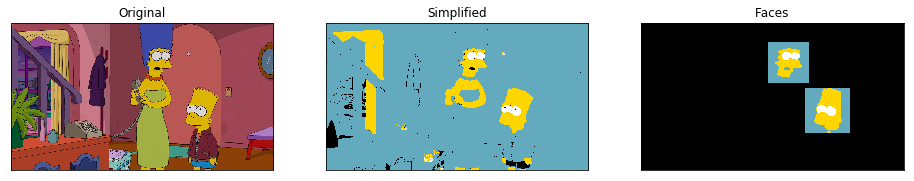

In [36]:
# Presents an example of how the process works:
# pick video from 'vid_paths'
vid_index = 1 
# pick [0,..,149] img from the imgs extracted
# from this video
img_index = 70

# Loads video and extracts the image
vid  = imageio.get_reader(vid_paths[vid_index], 'ffmpeg', 'I')
vidL = vid.get_length()
goto = np.linspace(np.floor(vidL*0.1).astype(int),
                    np.floor(vidL*0.9).astype(int),
                    num=150, dtype=int)
img = vid.get_data(goto[img_index])

# Processes the image and returns:
# 1) A simplified version of it that maintains only
#    the colors that appear on a face (Black,Yellow,White)
# 2) An image with only the detected faces 
_, _, extra1, extra2 = fd.find_face(img, True)

import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize = (16,12))
ax1.imshow(img)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.set_title('Original')
ax2.imshow(extra1)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title('Simplified')
ax3.imshow(extra2)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.set_title('Faces')

from PIL import Image
with Image.fromarray(img) as img:
    img.save('img.png')
with Image.fromarray(extra1) as img:
    img.save('simplified.png')
with Image.fromarray(extra2) as img:
    img.save('faces.png')    

In [ ]:
img_per_vid  = 150 # imgs looked at per video
total_vids = len(vid_paths) 
total_imgs   = img_per_vid*total_vids # total number of imgs
k = 0
reporter = Reporter(total_imgs, 'Processing', 1)
for i in vid_paths:
    vid  = imageio.get_reader(i, 'ffmpeg', 'I')
    vidL = vid.get_length()
    goto = np.linspace(np.floor(vidL*0.1).astype(int),
                        np.floor(vidL*0.9).astype(int),
                        num=img_per_vid, dtype=int)
    for j in goto:
        try:
            img_j  = vid.get_data(j)
            img_windows, windows = fd.find_face(img_j)
        except:
            img_windows, windows = [], []
        for w in range(len(img_windows)):
            k += 1
            with Image.fromarray(img_windows[w], 'RGB') as win:
                win.resize((200,200), Image.ANTIALIAS)
                win.save(os.path.join(dir_cropped, str(k)+'.png'))
            with Image.fromarray(windows[w], 'RGB') as win:
                win.resize((200,200), Image.ANTIALIAS)
                win.save(os.path.join(dir_simplified, str(k)+'.png'))
        reporter.report()
reporter.report(True)